<a href="https://colab.research.google.com/github/gillesvtsilvano/IA-PPGEEC-Winter_Course/blob/master/MNIST_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding MNIST dataset

In [0]:
# Importing libs
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset from OPENML (https://www.openml.org/d/554)
dataset = fetch_openml('mnist_784', version=1)
print(dataset.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# first 5 and last 5 features names
dataset.feature_names[:5] + ['...'] + dataset.feature_names[-5:]

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 '...',
 'pixel780',
 'pixel781',
 'pixel782',
 'pixel783',
 'pixel784']

In [4]:
# What are the Target variables?
y_set = sorted(set(dataset.target))
y_set

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

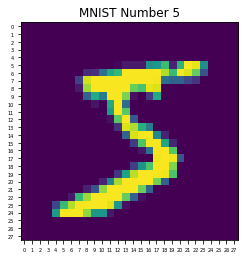

In [5]:
plt.title('MNIST Number ' + str(dataset.target[0]))
plt.xticks(range(0, 29), fontsize=5)
plt.yticks(range(0, 29), fontsize=5)
plt.grid(color='g')
plt.grid()
plt.imshow(np.array_split(dataset.data[0], 28))

In [0]:
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

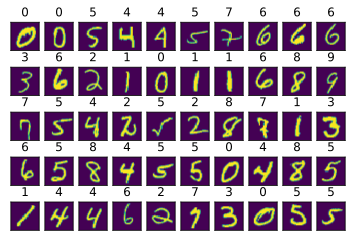

In [7]:
# Can I see an example of the data?

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

nlines = 5
ncols = 10
limit = nlines * ncols

for idx, (d, t) in enumerate(zip(X_train[:limit], y_train[:limit]), 1):
  plt.subplot(nlines, ncols, idx)
  plt.title(t)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array_split(d, 28))

In [15]:
classifier = LogisticRegression(tol=0.01)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8970178571428571

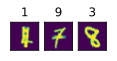

In [18]:
y_pred = classifier.predict(X_test)

miss = 1

for (d, p, t) in zip(X_test[:limit], y_pred[:limit], y_test[:limit]):
  if p != t:
    plt.subplot(nlines, ncols, miss)
    plt.title(p)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array_split(d, 28))
    miss += 1

In [0]:
classifier = LogisticRegression(tol=0.0001)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
y_pred = classifier.predict(X_test)

miss = 1

for (d, p, t) in zip(X_test[:limit], y_pred[:limit], y_test[:limit]):
  if p != t:
    plt.subplot(nlines, ncols, miss)
    plt.title(p)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array_split(d, 28))
    miss += 1